# Weather Summary in Saudi Arabia from (2017-2018)

<img src="wimg.png"  >

# Import the Modules 

In [1]:
#import pandas_profiling

In [2]:
#dataframe= pd.read_csv('weather-sa-2017-2019.csv')
# report = pandas_profiling.ProfileReport(dataframe_)
# report.to_file('report.html')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the Data Set 

In [4]:
dataframe= pd.read_excel('weather-sa-2017-2019.xlsx')
dataframe.head(10)

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,01-íäÇíÑ-17,1899-12-30 00:00:00,2017,1,1,24,0,Clear,17.0,11,0.64,1018.0,16
1,1,Qassim,01-íäÇíÑ-17,01:00:00,2017,1,1,1,0,Clear,17.0,6,0.64,1018.0,16
2,2,Qassim,01-íäÇíÑ-17,03:00:00,2017,1,1,3,0,Clear,15.0,11,0.72,1019.0,16
3,3,Qassim,01-íäÇíÑ-17,04:00:00,2017,1,1,4,0,Clear,15.0,11,0.72,1019.0,16
4,4,Qassim,01-íäÇíÑ-17,05:00:00,2017,1,1,5,0,Clear,15.0,9,0.72,1019.0,16
5,5,Qassim,01-íäÇíÑ-17,06:00:00,2017,1,1,6,0,Clear,13.0,13,0.82,1019.0,16
6,6,Qassim,01-íäÇíÑ-17,07:00:00,2017,1,1,7,0,Sunny,12.0,7,0.88,1019.0,16
7,7,Qassim,01-íäÇíÑ-17,08:00:00,2017,1,1,8,0,Sunny,14.0,9,0.72,1021.0,16
8,8,Qassim,01-íäÇíÑ-17,09:00:00,2017,1,1,9,0,Sunny,15.0,9,0.72,1021.0,7
9,9,Qassim,01-íäÇíÑ-17,10:00:00,2017,1,1,10,0,Sunny,17.0,7,0.64,1021.0,9


# EDA 
Check the null values

In [5]:
dataframe.isnull().sum() ## check null values

Unnamed: 0      0
city            0
date            0
time            0
year            0
month           0
day             0
hour            0
minute          0
weather         0
temp          348
wind            0
humidity       17
barometer      72
visibility      0
dtype: int64

# EDA

In [6]:
# replace the null values with the nearset vlay
dataframe.fillna(method='bfill', inplace=True) 

In [7]:
dataframe.isnull().sum() ## check null values after replacments 

Unnamed: 0    0
city          0
date          0
time          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

In [8]:
# drop unnecessary columns 
drop_cols = ['Unnamed: 0', 'day', 'hour', 'minute', 'time']
dataframe = dataframe.drop(drop_cols, axis=1)

dataframe.head(5)

,city,date,year,month,weather,temp,wind,humidity,barometer,visibility
0,Qassim,01-íäÇíÑ-17,2017,1,Clear,17.0,11,0.64,1018.0,16
1,Qassim,01-íäÇíÑ-17,2017,1,Clear,17.0,6,0.64,1018.0,16
2,Qassim,01-íäÇíÑ-17,2017,1,Clear,15.0,11,0.72,1019.0,16
3,Qassim,01-íäÇíÑ-17,2017,1,Clear,15.0,11,0.72,1019.0,16
4,Qassim,01-íäÇíÑ-17,2017,1,Clear,15.0,9,0.72,1019.0,16


In [9]:
print ("Data Frame Shape : ", dataframe.shape , "\n")

Data Frame Shape :  (249023, 10) 



In [10]:
print (dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city        249023 non-null  object 
 1   date        249023 non-null  object 
 2   year        249023 non-null  int64  
 3   month       249023 non-null  int64  
 4   weather     249023 non-null  object 
 5   temp        249023 non-null  float64
 6   wind        249023 non-null  int64  
 7   humidity    249023 non-null  float64
 8   barometer   249023 non-null  float64
 9   visibility  249023 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 19.0+ MB
None


In [11]:
#dataframe['humidity'] = dataframe['humidity'].apply(lambda x: float(x.replace('%', ''))/100)
#dataframe['humidity']

In [12]:
print ("Data Frame Describition:") 
dataframe.describe()

Data Frame Describition:


,year,month,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,2017.710007,6.050694,25.548327,12.957104,0.375528,1015.452749,11.053453
std,0.706113,3.521591,23.642479,8.711619,0.235928,6.972872,7.053005
min,2017.000000,1.000000,0.000000,-1.000000,0.000000,904.000000,-1.000000
25%,2017.000000,3.000000,18.000000,7.000000,0.170000,1011.000000,5.000000
50%,2018.000000,6.000000,24.000000,11.000000,0.320000,1016.000000,16.000000
75%,2018.000000,9.000000,31.000000,19.000000,0.550000,1021.000000,16.000000
max,2019.000000,12.000000,650.000000,163.000000,1.000000,1101.000000,161.000000


In [13]:
print(pd.DataFrame(dataframe.groupby(['year']).month.nunique()).reset_index().sort_values('month',ascending=False))
#2019 have to be exclude since it is not a complated year to avoid any misleading values 
dataframe = dataframe[dataframe.year!=2019]

   year  month
0  2017     12
1  2018     12
2  2019      4


# Data Visualization

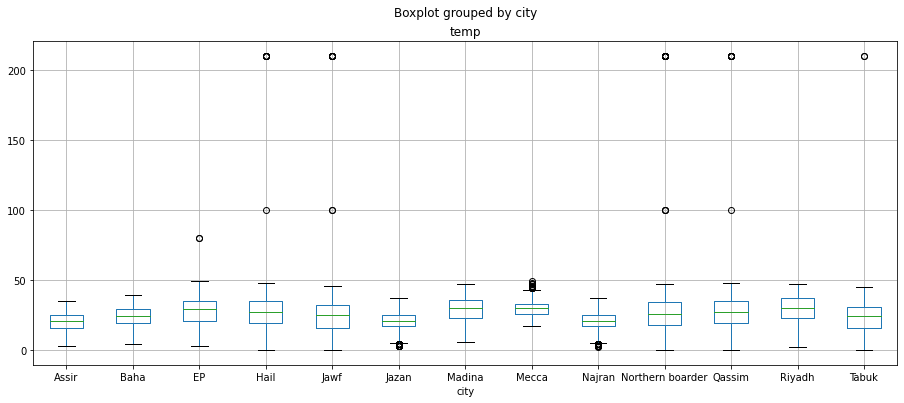

In [14]:
# check the outliers for temp using boxplot
dataframe.boxplot(column=['temp'], by='city', figsize=(15, 6))
plt.show();

### We found out some incorrect temps values over 60

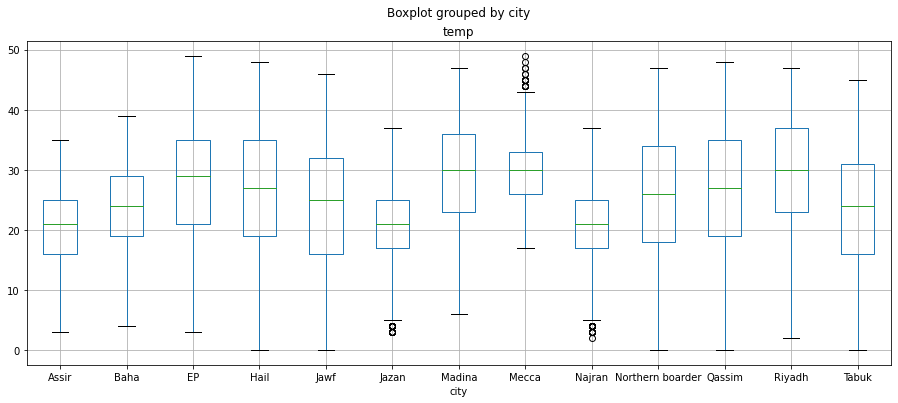

In [15]:
# Solving the outliers issue with temp 
q1 = dataframe['temp'].quantile(0.25)
q3 = dataframe['temp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
#Exluding outer layers 
dataframe = dataframe.drop(dataframe[(dataframe['temp'] < lower_bound) | (dataframe['temp'] > upper_bound)].index)

dataframe.boxplot(column=['temp'], by='city', figsize=(15, 6))
plt.show();

### Checking if the temps vlaues are valid

In [16]:
print('Maximum Tempurature',pd.DataFrame(dataframe.groupby('city').agg({'temp':'max'})).reset_index().sort_values('temp',ascending=False)) # get max temp to check the validition 
print('Minimum Tempurature',pd.DataFrame(dataframe.groupby('city').agg({'temp':'min'})).reset_index().sort_values('temp',ascending=True)) # get max temp to check the validition 

Maximum Tempurature                 city  temp
2                 EP  49.0
7              Mecca  49.0
3               Hail  48.0
10            Qassim  48.0
6             Madina  47.0
9   Northern boarder  47.0
11            Riyadh  47.0
4               Jawf  46.0
12             Tabuk  45.0
1               Baha  39.0
5              Jazan  37.0
8             Najran  37.0
0              Assir  35.0
Minimum Tempurature                 city  temp
3               Hail   0.0
4               Jawf   0.0
9   Northern boarder   0.0
10            Qassim   0.0
12             Tabuk   0.0
8             Najran   2.0
11            Riyadh   2.0
0              Assir   3.0
2                 EP   3.0
5              Jazan   3.0
1               Baha   4.0
6             Madina   6.0
7              Mecca  17.0


### What is the top 5 citiest that reach a temperature of 50

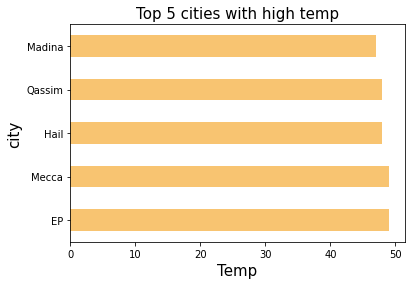

In [17]:
# The highest 5 citiest that reach a temperature of 50 after update the the vlaid temp
plt.xlabel("Temp",fontsize = 15)
plt.ylabel("City",fontsize = 15)
plt.title('Top 5 cities with high temp',fontsize = 15)
dataframe.groupby('city')['temp'].max().nlargest(5).plot.barh(color = '#F8C471')
plt.show()


### What are the cities with the lowest temperature?

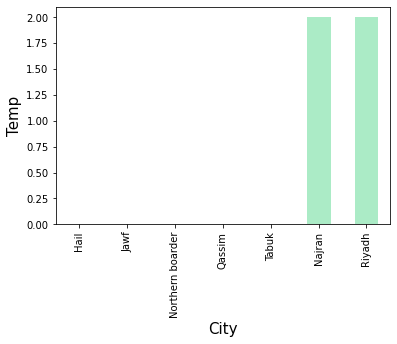

In [18]:
#lowest 7 city temp

dataframe.groupby('city')['temp'].min().nsmallest(7).plot.bar(color = '#ABEBC6')
plt.xlabel("City",fontsize = 15)
plt.ylabel("Temp",fontsize = 15)
plt.show()

### Is there a relationship between weather and visibility?

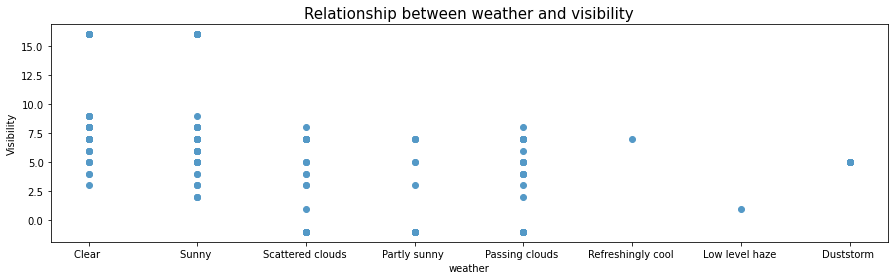

In [34]:
# find the Relationship between weather and visibility'
plt.scatter(dataframe['weather'].head(800), dataframe['visibility'].head(800), color= '#5499C7')
plt.xlabel('weather')
plt.ylabel('Visibility')
plt.title('Relationship between weather and visibility' , fontsize = 15)
fg = plt.gcf()
fg.set_size_inches(15,4)
plt.show()

### What is the common weather condition for Saudi Arabia?

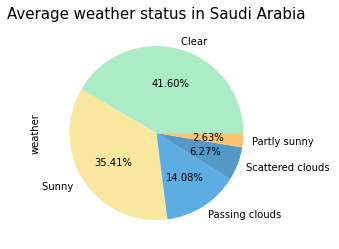

In [20]:
# find the average weather status for saudi arabia 
plt.title('Average weather status in Saudi Arabia',fontsize = 15)

dataframe.groupby(['weather'])['weather'].count().nlargest(5).plot.pie(colors = ['#ABEBC6','#F9E79F', '#5DADE2' , '#5499C7', '#F8C471'] , autopct='%1.2f%%')
plt.show() 

### What is the average weather in Saudi Arabia?

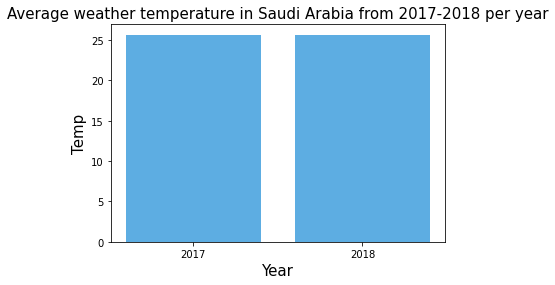

In [21]:
dataframe['year'] = dataframe['year'].astype(str)


df_t = pd.DataFrame(dataframe.groupby(['year','month']).temp.mean()).reset_index()
df_t2 = pd.DataFrame(dataframe.groupby(['year']).temp.mean()).reset_index()

#Average weather temperature in Saudi Arabia from 2017-2019 per year
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Temp",fontsize = 15)
plt.title('Average weather temperature in Saudi Arabia from 2017-2018 per year',fontsize = 15)
plt.bar(df_t2['year'], df_t2['temp'], label='Date Vs Temp' , color = '#5DADE2' )
plt.show()

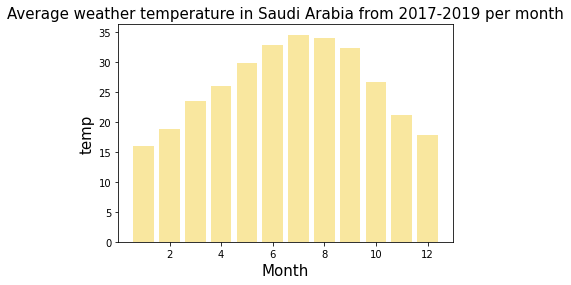

In [22]:
#Average weather temperature in Saudi Arabia from 2017-2019 per month
plt.xlabel("Month",fontsize = 15)
plt.ylabel("temp",fontsize = 15)
plt.title('Average weather temperature in Saudi Arabia from 2017-2019 per month',fontsize = 15)
plt.bar(df_t['month'], df_t['temp'] , color = '#F9E79F')

plt.show()

### Average weather for each city with months

 =================================2017=================================


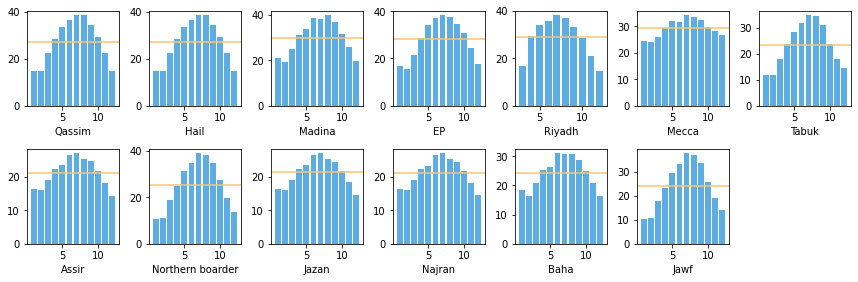

 =================================2018=================================


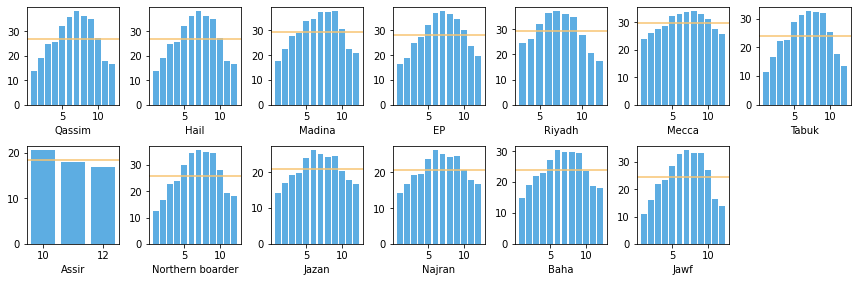

In [23]:

y = dataframe.year.unique()
col = dataframe.city.unique()
#Average temperature of all cities between 2017-2019 with months 
c=1
for j in y:
    print(f' ================================={j}=================================')
    c=1
    for i in col:
        ee=pd.DataFrame(dataframe[(dataframe.city==i)&(dataframe.year==j)].groupby(['month']).temp.mean()).reset_index().sort_values('temp',ascending=False).reset_index(drop=True)
        fig = plt.gcf()
        fig.set_size_inches(12, 4)
        plt.subplot(2,7,c)
        plt.bar(ee['month'], ee['temp'] , color = '#5DADE2')
        plt.axhline(y=np.nanmean(ee.temp),color='#F8C471')#to  find the avarage .
        plt.xlabel(i)
        fig.tight_layout(pad=1.0)
#         print(i)
        c+=1
       # plt.xlabel(i)
        
    plt.show()

### Comparing between two cites

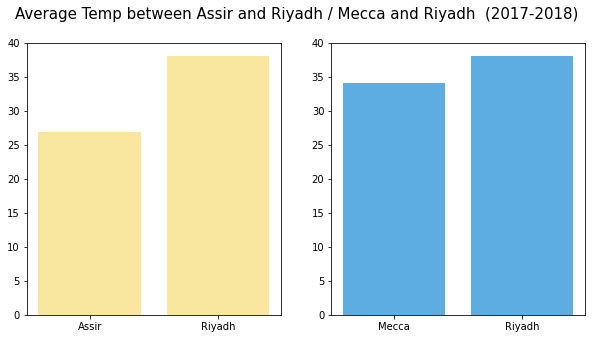

In [24]:
df_t5 = pd.DataFrame(dataframe.groupby(['city','month']).temp.mean().reset_index())
group = pd.DataFrame(dataframe.groupby(['city','year','month']).temp.mean().reset_index())
df_t6= pd.DataFrame(dataframe.groupby(['city','month']).temp.mean().reset_index())


## compare between two cites 2017-2018

plt.figure(figsize=[10,5])
plt.suptitle('Average Temp between Assir and Riyadh / Mecca and Riyadh  (2017-2018)',fontsize = 15)
plt.subplot(1,2,1)
filtered_data = group[(group['year'] >= '2017') & (group['year'] <= '2018') & (group['city'].isin(['Assir', 'Riyadh']))]
#fig = plt.gcf()
#fig.set_size_inches(9,2)
plt.bar(filtered_data['city'], filtered_data['temp'],color ='#F9E79F')
#plt.title('Average Temp between Assir and Riyadh  (2017-2018)')

plt.subplot(1,2,2)
filtered_data = group[(group['year'] >= '2017') & (group['year'] <= '2018') & (group['city'].isin(['Mecca', 'Riyadh']))]
#fig = plt.gcf()
#fig.set_size_inches(9,2)
plt.bar(filtered_data['city'], filtered_data['temp'],color ='#5DADE2');
#plt.title('Average Temp between Northern boarder and Riyadh  (2017-2018)')

In [25]:
dataframe.temp.mean()

25.63757757691819

### Is there a relationship between humidity , wind and visibility?

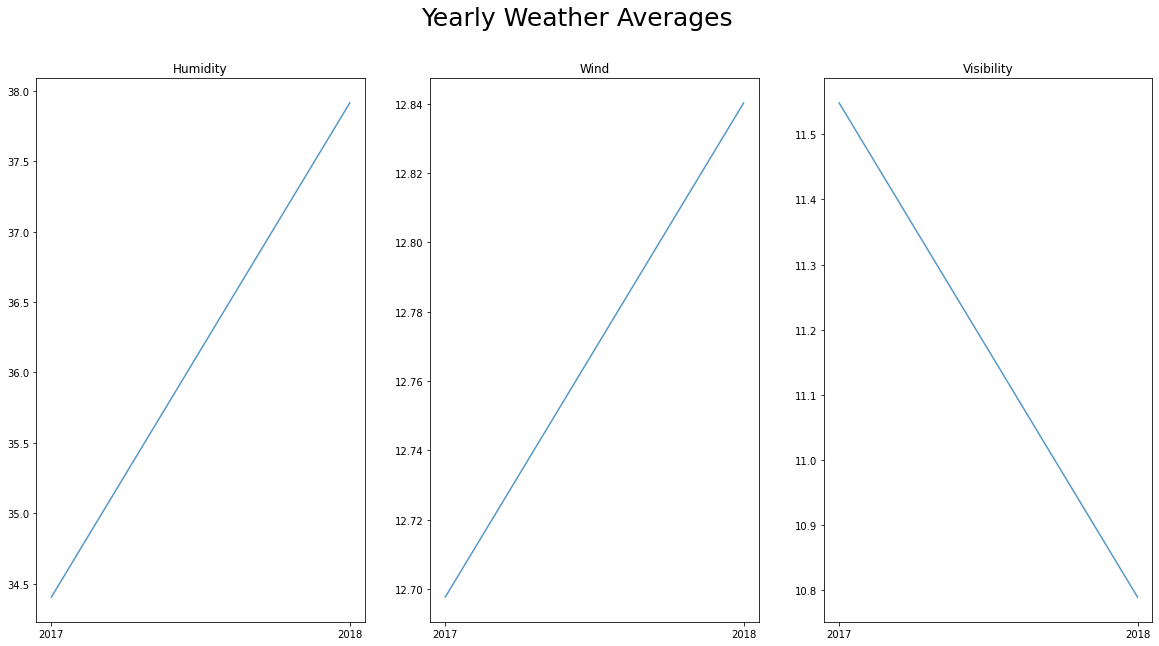

In [30]:
data_ = dataframe.copy()

grouped_df = data_.groupby('year').agg({'humidity': ['mean'],'visibility': ['mean'], 'wind': ['mean']})
years = grouped_df.index.values
humidity = grouped_df['humidity'].values*100
visibility = grouped_df['visibility'].values
wind = grouped_df['wind'].values


plt.figure(figsize=[20,10])
plt.suptitle('Yearly Weather Averages', fontsize = 25)

plt.subplot(1,3,1)
plt.title('Humidity')
plt.plot(years, humidity , c = '#5499C7');


plt.subplot(1,3,2)
plt.title('Wind')
plt.plot(years, wind , c = '#5499C7');



plt.subplot(1,3,3)
plt.title('Visibility')
plt.plot(years, visibility , c = '#5499C7');

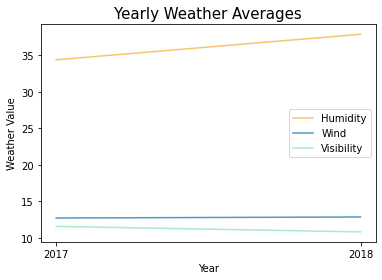

In [27]:
plt.plot(years, humidity, label='Humidity' , c = '#F8C471')
plt.plot(years, wind, label='Wind' , c = '#5499C7')
plt.plot(years, visibility, label='Visibility' , c= '#ABEBC6')

plt.xlabel('Year')
plt.ylabel('Weather Value')
plt.title('Yearly Weather Averages' ,  fontsize = 15)

plt.legend()

plt.show()

In [28]:
array = dataframe.to_numpy()
print (array[1]) # convert dataframe to array and print first row 

['Qassim' '01-íäÇíÑ-17' '2017' 1 'Clear ' 17.0 6 0.64 1018.0 16]
